# Data analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
FILE_PATH = "weather_data.xlsx"
df = pd.read_excel(FILE_PATH)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dt          45528 non-null  object 
 1   temp        45528 non-null  float64
 2   pressure    45528 non-null  float64
 3   humidity    45528 non-null  int64  
 4   clouds      45528 non-null  int64  
 5   wind_speed  45528 non-null  float64
 6   wind_deg    45528 non-null  int64  
 7   season      45528 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 2.8+ MB


In [5]:
df.shape

(45528, 8)

In [6]:
df.head(10)

dt  temp  pressure  humidity  clouds  wind_speed  wind_deg  \
0  2020-01-01T00:00  14.6    1018.5        75      42        11.9       194   
1  2020-01-01T01:00  14.5    1018.3        75      47        10.4       194   
2  2020-01-01T02:00  14.9    1017.6        72      42         9.9       199   
3  2020-01-01T03:00  15.0    1017.4        71      52        12.2       199   
4  2020-01-01T04:00  14.9    1017.4        73      32        15.2       194   
5  2020-01-01T05:00  14.7    1017.5        73      53        16.7       187   
6  2020-01-01T06:00  14.8    1017.9        74      42        17.3       201   
7  2020-01-01T07:00  15.2    1017.8        72      40        18.6       195   
8  2020-01-01T08:00  15.1    1017.8        72      52        19.1       202   
9  2020-01-01T09:00  15.1    1017.2        74      39        17.9       202   

   season  
0  Winter  
1  Winter  
2  Winter  
3  Winter  
4  Winter  
5  Winter  
6  Winter  
7  Winter  
8  Winter  
9  Winter

In [7]:
df["dt"] = pd.to_datetime(df["dt"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dt          45528 non-null  datetime64[ns]
 1   temp        45528 non-null  float64       
 2   pressure    45528 non-null  float64       
 3   humidity    45528 non-null  int64         
 4   clouds      45528 non-null  int64         
 5   wind_speed  45528 non-null  float64       
 6   wind_deg    45528 non-null  int64         
 7   season      45528 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 2.8+ MB


In [9]:
df_numeric = df.drop(columns=["dt", "season"], errors="ignore")

In [11]:
df_numeric.head(10)

temp  pressure  humidity  clouds  wind_speed  wind_deg
0  14.6    1018.5        75      42        11.9       194
1  14.5    1018.3        75      47        10.4       194
2  14.9    1017.6        72      42         9.9       199
3  15.0    1017.4        71      52        12.2       199
4  14.9    1017.4        73      32        15.2       194
5  14.7    1017.5        73      53        16.7       187
6  14.8    1017.9        74      42        17.3       201
7  15.2    1017.8        72      40        18.6       195
8  15.1    1017.8        72      52        19.1       202
9  15.1    1017.2        74      39        17.9       202

In [12]:
correlation_matrix = df_numeric.corr()

In [13]:
print("\n Full Feature Correlation Matrix:")
print(correlation_matrix)


 Full Feature Correlation Matrix:
                temp  pressure  humidity    clouds  wind_speed  wind_deg
temp        1.000000 -0.677199  0.004098 -0.430745   -0.137660  0.178980
pressure   -0.677199  1.000000 -0.213893  0.203927   -0.118557 -0.296588
humidity    0.004098 -0.213893  1.000000 -0.050647   -0.044753  0.138206
clouds     -0.430745  0.203927 -0.050647  1.000000    0.226760 -0.050583
wind_speed -0.137660 -0.118557 -0.044753  0.226760    1.000000  0.094553
wind_deg    0.178980 -0.296588  0.138206 -0.050583    0.094553  1.000000


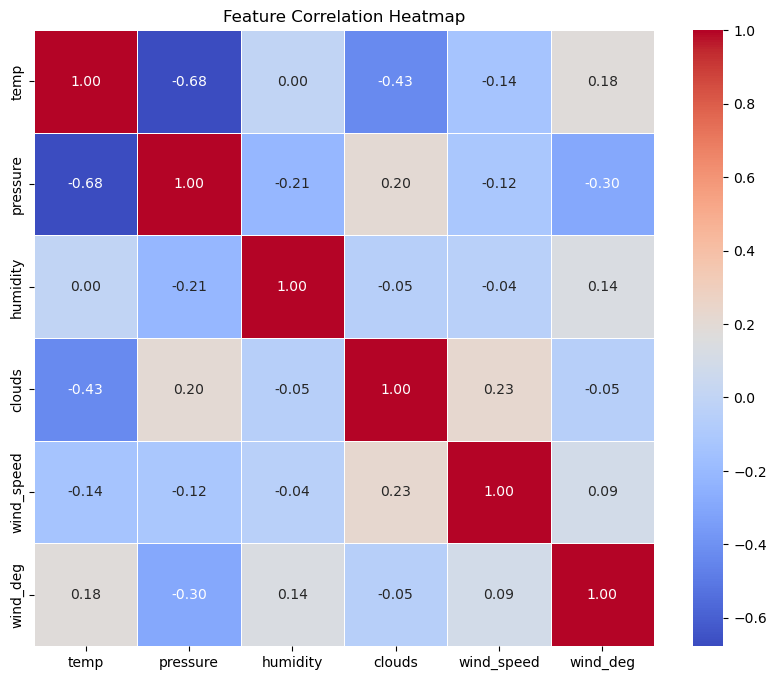

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()